### Import your librares

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

### Load your dataset

In [2]:
df=pd.read_csv('seattle_weather.csv')
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [3]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [20]:
df.dtypes

DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object

### Handle missing data in PRCP and RAIN columns

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### Repeat the following steps for each column within outliers
- Visualize the outliers
- Detect if your data set contains any outliers
- Identify lower & higher limit of outliers
- Drop all outliers
- Visualize the column after processing

<Axes: >

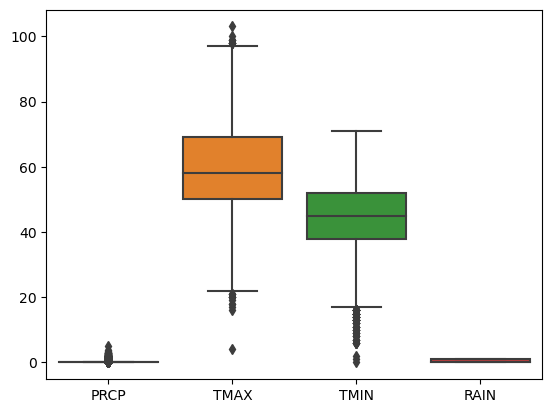

In [7]:
#before 
sns.boxplot(data = df)

In [8]:
#PRCP
Q1 = np.percentile(df['PRCP'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['PRCP'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print(Q1 , Q3 , IQR)
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

0.0 0.1 0.1
lower bound outliers  -0.15000000000000002
higher bound outliers 0.25


In [9]:
 df.drop(df[(df['PRCP'] > 0.25) | (df['PRCP'] <  -0.15000000000000002)].index,inplace=True)


In [15]:
#TMAX
Q1 = np.percentile(df['TMAX'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TMAX'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print(Q1 , Q3 , IQR)
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

51.0 70.0 19.0
lower bound outliers  22.5
higher bound outliers 98.5


In [16]:
 df.drop(df[(df['TMAX'] >98.5) | (df['TMAX'] < 22.5)].index,inplace=True)


In [17]:
#TMIN
Q1 = np.percentile(df['TMIN'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TMIN'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print(Q1 , Q3 , IQR)
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

38.0 52.0 14.0
lower bound outliers  17.0
higher bound outliers 73.0


In [18]:
 df.drop(df[(df['TMIN'] >73.0) | (df['TMIN'] <  17.0)].index,inplace=True)


<Axes: >

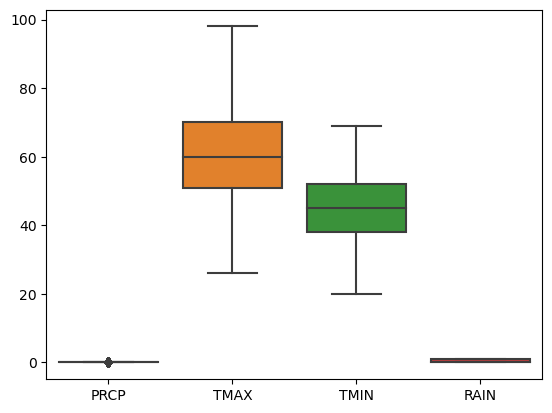

In [19]:
#after
sns.boxplot(data = df)